In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# vstack - adds rows, hstack - adds columns
# csr_matrix - used to handle sparse matrix
from scipy.sparse import vstack, hstack, csr_matrix

In [4]:
# CountVectorizer - Simply, counts word frequencies 
# TFIDF - More importance/weights on "rare" words. Less importance/weights on "frequent" words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
# LabelBinarizer - Converts labels into numerical representation "G,B,R" -> [1,2,3]
from sklearn.preprocessing import LabelBinarizer

In [6]:
# Ridge - Reduces multicollinearity in regression. Applies L2 Regularization
from sklearn.linear_model import Ridge

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
/kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
/kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z


In [10]:
!apt-get install p7zip
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z




Suggested packages:
  p7zip-full
The following NEW packages will be installed:
  p7zip
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 358 kB of archives.
After this operation, 996 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 p7zip amd64 16.02+dfsg-6 [358 kB]
Fetched 358 kB in 1s (322 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package p7zip.
(Reading database ... 95327 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-6_amd64.deb ...
Unpacking p7zip (16.02+dfsg-6) ...
Setting up p7zip (16.02+dfsg-6) ...

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/mercari-price-suggestion-challenge/

In [11]:
!unzip /kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
!unzip /kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip

Archive:  /kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
  inflating: sample_submission_stg2.csv  
Archive:  /kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
  inflating: test_stg2.tsv           


In [12]:
# Create training set
train = pd.read_csv('train.tsv', sep = '\t')
# Create testing set
test = pd.read_csv('test_stg2.tsv', sep='\t')

In [13]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1482535, 8)
Test data shape: (3460725, 7)


In [14]:
train.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


In [15]:
# Create log price variable (Transformation)
y = np.log1p(train['price'])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


*category_name, brand_name, item_description có chứa giá trị null*

In [17]:
# Create combined set. You would want to apply count vectorizer on combined set so you can get the list of all possible words.
combined = pd.concat([train,test])

# Create the submission set (Only contains the test ID)
submission = test[['test_id']]

# Create size of train
train_size = len(train)

In [18]:
combined.shape

(4943260, 9)

*tổng dữ liệu khi hợp nhất train và test là : 4943260*

In [19]:
combined_ML = combined.sample(frac=0.1).reset_index(drop=True)

In [20]:
combined_ML.shape

(494326, 9)

In [21]:
train.price.describe().apply(lambda x: format(x, 'f'))

count    1482535.000000
mean          26.737516
std           38.586066
min            0.000000
25%           10.000000
50%           17.000000
75%           29.000000
max         2009.000000
Name: price, dtype: object

* Giá trung bình trong tập dữ liệu là 26 đô la
* Giá trị trung vị trong tập dữ liệu là 17 Đô la
* Giá tối đa trong tập dữ liệu là 2000 Đô la
* Do tập dữ liệu sai lệch, giá trung bình là mức giá đáng tin cậy hơn để đánh giá.

In [22]:
np.percentile(train.price, 99)

170.0

**Loại bỏ chấm câu - punctuation**

In [23]:
from string import punctuation

In [24]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

In [26]:
# Create a list of punctuation replacements
punctuation_symbols = []
for symbol in punctuation:
    punctuation_symbols.append((symbol, ''))
    
punctuation_symbols

[('!', ''),
 ('"', ''),
 ('#', ''),
 ('$', ''),
 ('%', ''),
 ('&', ''),
 ("'", ''),
 ('(', ''),
 (')', ''),
 ('*', ''),
 ('+', ''),
 (',', ''),
 ('-', ''),
 ('.', ''),
 ('/', ''),
 (':', ''),
 (';', ''),
 ('<', ''),
 ('=', ''),
 ('>', ''),
 ('?', ''),
 ('@', ''),
 ('[', ''),
 ('\\', ''),
 (']', ''),
 ('^', ''),
 ('_', ''),
 ('`', ''),
 ('{', ''),
 ('|', ''),
 ('}', ''),
 ('~', '')]

**Loại bỏ chữ số**

In [27]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

**Loại bỏ từ dừng - stopword**

In [28]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

**Trường hợp với chữ thường**

In [29]:
def to_lower(x):
    return x.lower()

In [30]:
train.count()

train_id             1482535
name                 1482535
item_condition_id    1482535
category_name        1476208
brand_name            849853
price                1482535
shipping             1482535
item_description     1482531
dtype: int64

In [31]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [32]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [33]:
bins = [0, 10, 17, 29, 2001]
labels = ['q1','q2','q3','q4']
train['price_bin'] = pd.cut(train['price'], bins=bins, labels=labels)
train.groupby('price_bin')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_bin,,,,,,,,
q1,375615.0,7.715192,2.077888,3.0,6.0,8.0,10.0,10.0
q2,378177.0,13.842940,1.794584,10.5,12.0,14.0,15.0,17.0
q3,359743.0,22.555694,3.337832,17.5,20.0,22.0,25.0,29.0
q4,368123.0,63.527701,63.508250,29.5,35.0,45.0,66.0,2000.0


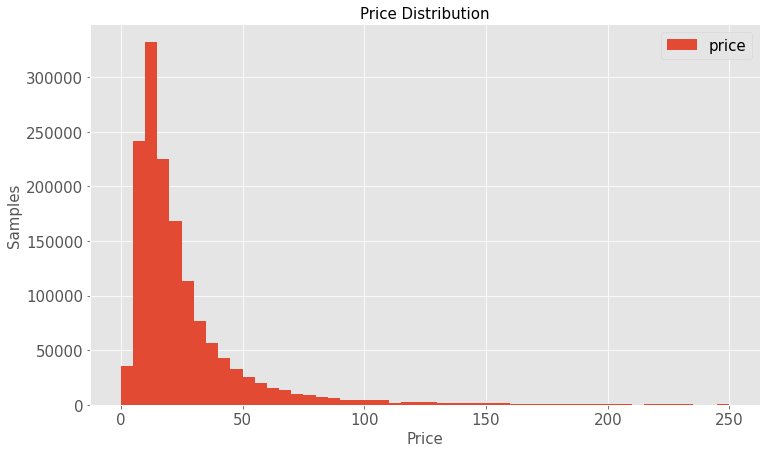

In [34]:
plt.figure(figsize=(12, 7))
plt.hist(train['price'], bins=50, range=[0,250], label='price')
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

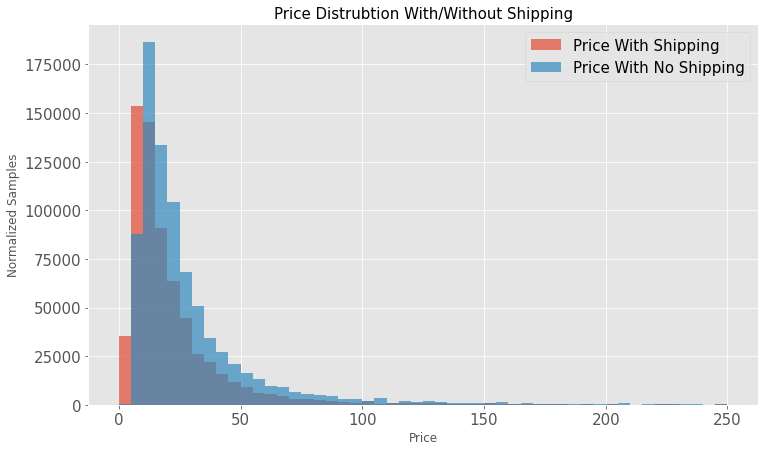

In [35]:
shipping = train[train['shipping']==1]['price']
no_shipping = train[train['shipping']==0]['price']

plt.figure(figsize=(12,7))
plt.hist(shipping, bins=50, range=[0,250], alpha=0.7, label='Price With Shipping')
plt.hist(no_shipping, bins=50, range=[0,250], alpha=0.7, label='Price With No Shipping')
plt.title('Price Distrubtion With/Without Shipping', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Normalized Samples')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [36]:
# Amount of unique brand names
train['brand_name'].nunique()

4809

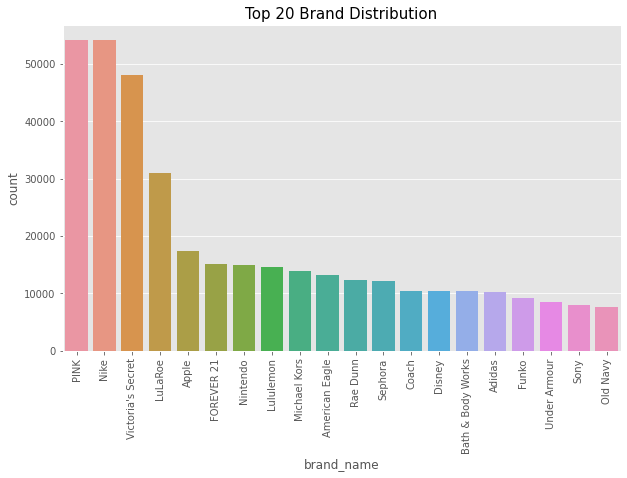

In [37]:
# Top 20 Brand Distribution
b20 = train['brand_name'].value_counts()[0:20].reset_index().rename(columns={'index': 'brand_name', 'brand_name':'count'})
ax = sns.barplot(x="brand_name", y="count", data=b20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

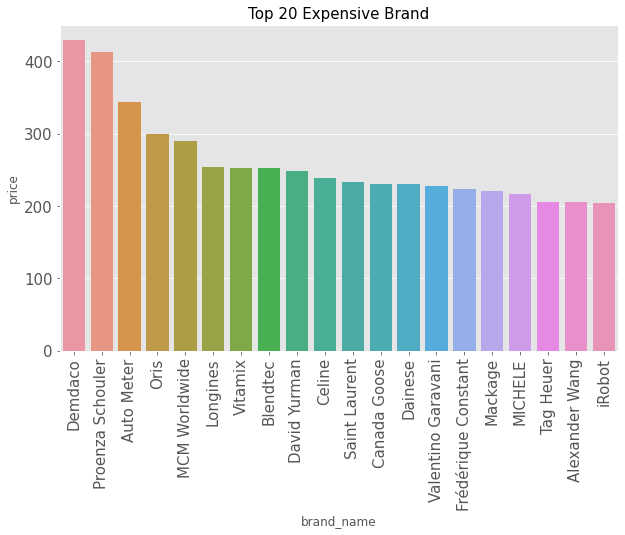

PINK                 0.063644
Nike                 0.063591
Victoria's Secret    0.056523
LuLaRoe              0.036505
Apple                0.020382
                       ...   
CIOR                 0.000001
Kryptonics           0.000001
Filter               0.000001
Dyson                0.000001
Emu                  0.000001
Name: brand_name, Length: 4809, dtype: float64

In [38]:
# Display Top 20 Expensive Brands By Mean Price
top20_brand = train.groupby('brand_name', axis=0).mean()
df_expPrice = pd.DataFrame(top20_brand.sort_values('price', ascending = False)['price'][0:20].reset_index())


ax = sns.barplot(x="brand_name", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top 20 Expensive Brand', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()# Displayd frequency ratio of brand names
train['brand_name'].value_counts(1)

* Chúng em thấy có thể cần phải tách các danh mục để có thể so khớp các danh mục chung và có được thông tin chi tiết tốt hơn từ dữ liệu.
* Tách category_name thành category_main, category_sub1, category_sub2

In [39]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

cat_train = train[['category_main','category_sub1','category_sub2', 'price']]

cat_train.head()

,category_main,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


In [40]:
# Electronics have the highest std
train.groupby('category_main')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category_main,,,,,,,,
Beauty,207828.0,19.671536,21.360135,0.0,10.0,15.0,24.0,2000.0
Electronics,119631.0,34.191769,64.037637,0.0,9.0,15.0,30.0,1909.0
Handmade,30840.0,18.154410,27.756418,0.0,6.0,12.0,20.0,1750.0
Home,67871.0,24.536599,24.417061,0.0,12.0,18.0,29.0,848.0
Kids,171689.0,20.642315,22.730876,0.0,10.0,14.0,24.0,809.0
Men,93363.0,34.693347,41.264184,0.0,14.0,21.0,40.0,1309.0
Other,45351.0,20.809817,29.847758,0.0,9.0,14.0,23.0,1400.0
Sports & Outdoors,24331.0,25.534565,29.324018,0.0,11.0,16.0,28.0,915.0
Vintage & Collectibles,46530.0,27.339426,53.507495,0.0,10.0,16.0,27.0,1709.0


In [41]:
# Display distribution
train['category_main'].value_counts(1)

Women                     0.451404
Beauty                    0.141205
Kids                      0.116651
Electronics               0.081281
Men                       0.063434
Home                      0.046114
Vintage & Collectibles    0.031614
Other                     0.030813
Handmade                  0.020954
Sports & Outdoors         0.016531
Name: category_main, dtype: float64

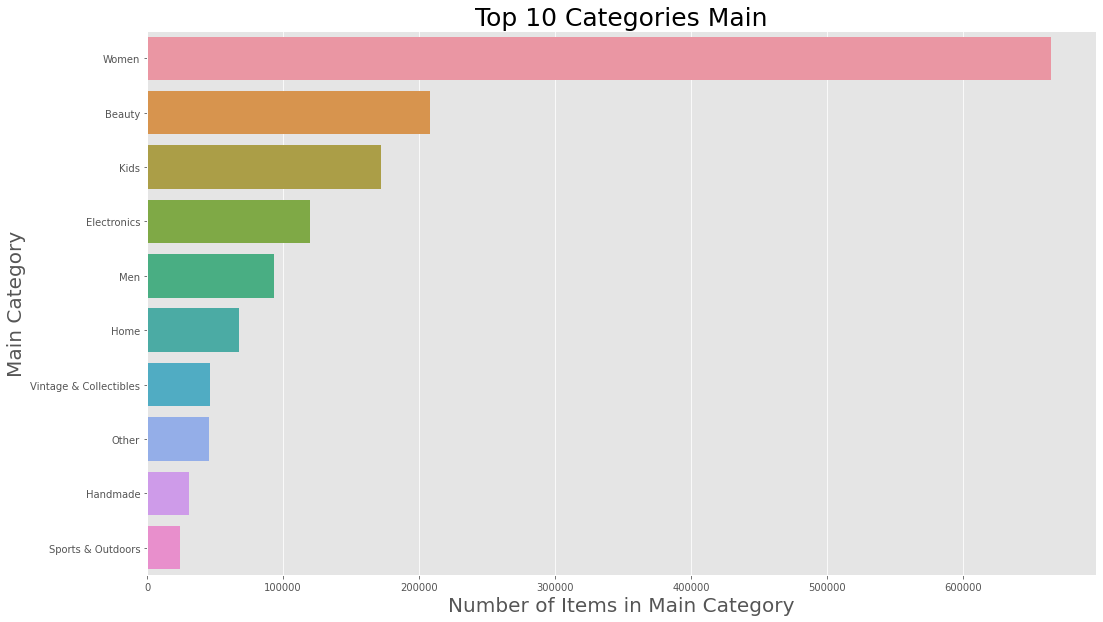

In [42]:
plt.figure(figsize=(17,10))
sns.countplot(y = train['category_main'], order = train['category_main'].value_counts().index, orient = 'v')
plt.title('Top 10 Categories Main', fontsize = 25)
plt.ylabel('Main Category', fontsize = 20)
plt.xlabel('Number of Items in Main Category', fontsize = 20)
plt.show()

* Women và Beauty chiếm phần lớn trong phân phối
* Women và Beauty chiếm 56% phân phối

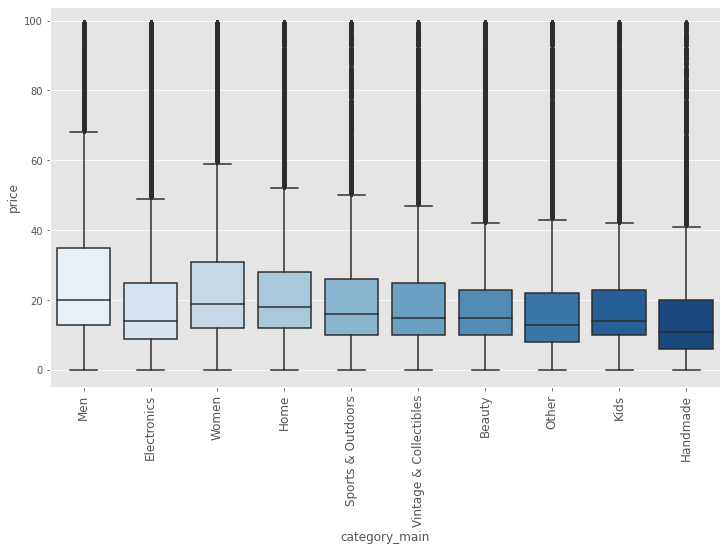

In [43]:
#main = pd.DataFrame(cat_train['category_main'].value_counts()).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
fig, axes = plt.subplots(figsize=(12, 7))
main = cat_train[cat_train["price"]<100]
# Use a color palette
ax = sns.boxplot( x=main["category_main"], y=main["price"], palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=12)

plt.show()

In [44]:
# Create a "no_brand" column 
train['no_brand'] = train['brand_name'].isnull()

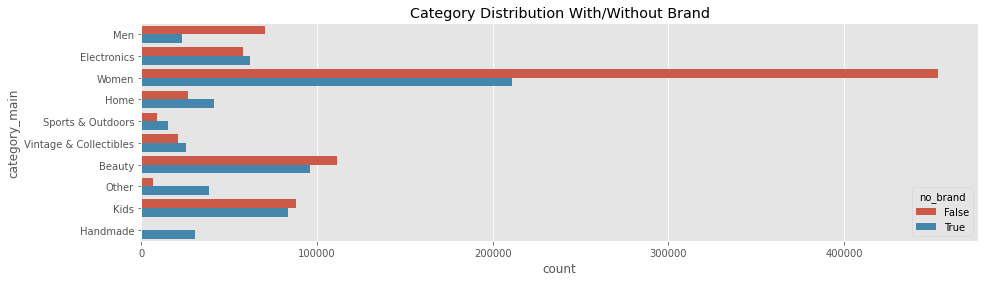

In [45]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='category_main', hue='no_brand', data=train).set_title('Category Distribution With/Without Brand');
plt.show()

* Ta thấy sản phẩm của "Men" và "Women" không có nhãn hiệu phân phối nhiều hơn có nhãn hiệu
* "Electronics" và "Sport & Outdoors" có nhãn hiệu phân phối nhiều hơn không nhãn hiệu
* ...

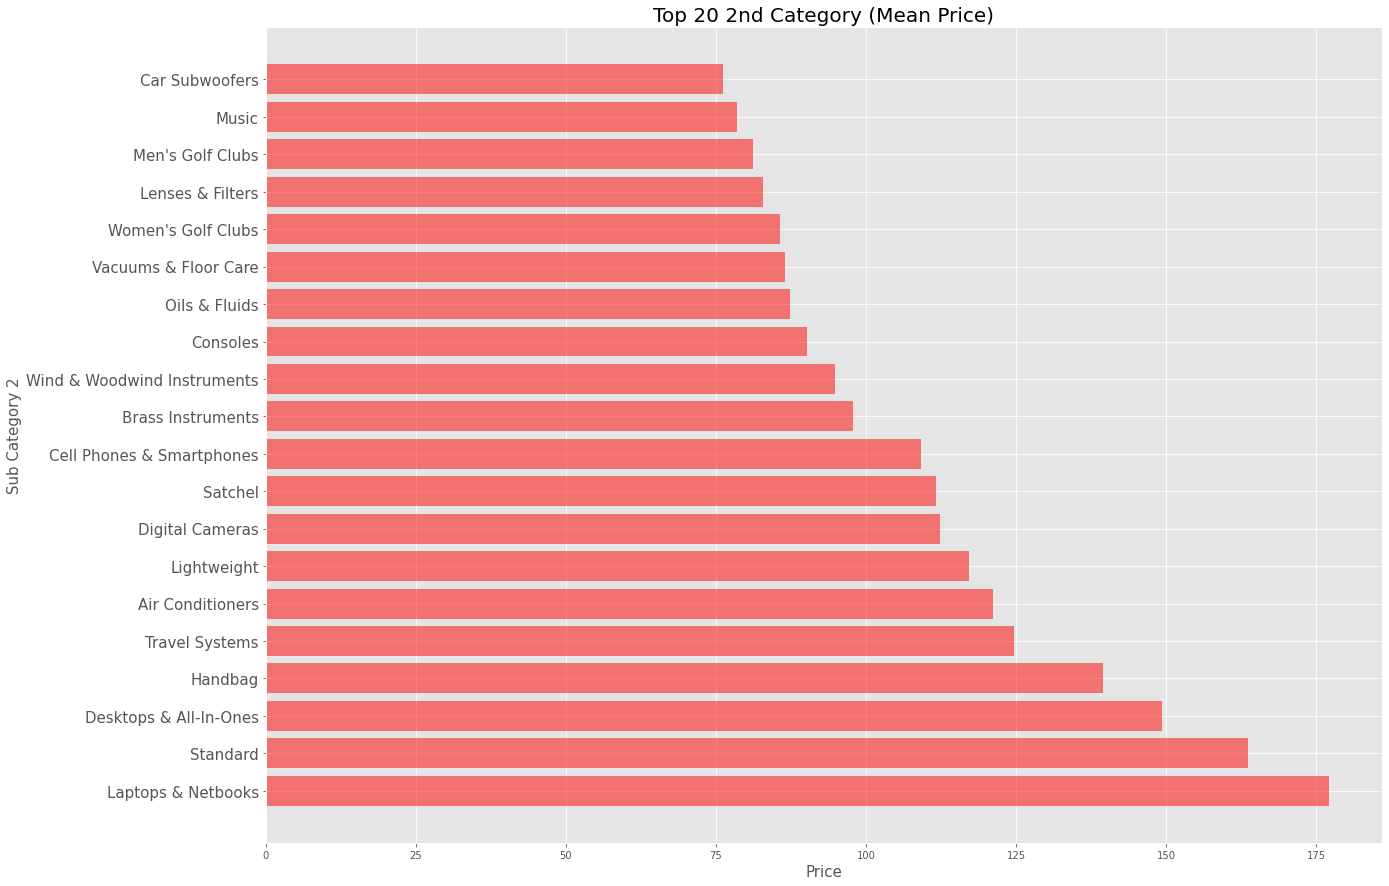

In [46]:
df = cat_train.groupby(['category_sub2'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False).head(20)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df['category_sub2'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 2', fontsize=15)
plt.title('Top 20 2nd Category (Mean Price)', fontsize=20)
plt.show()

* Top 20 giá trung bình của các nhãn category_sub2

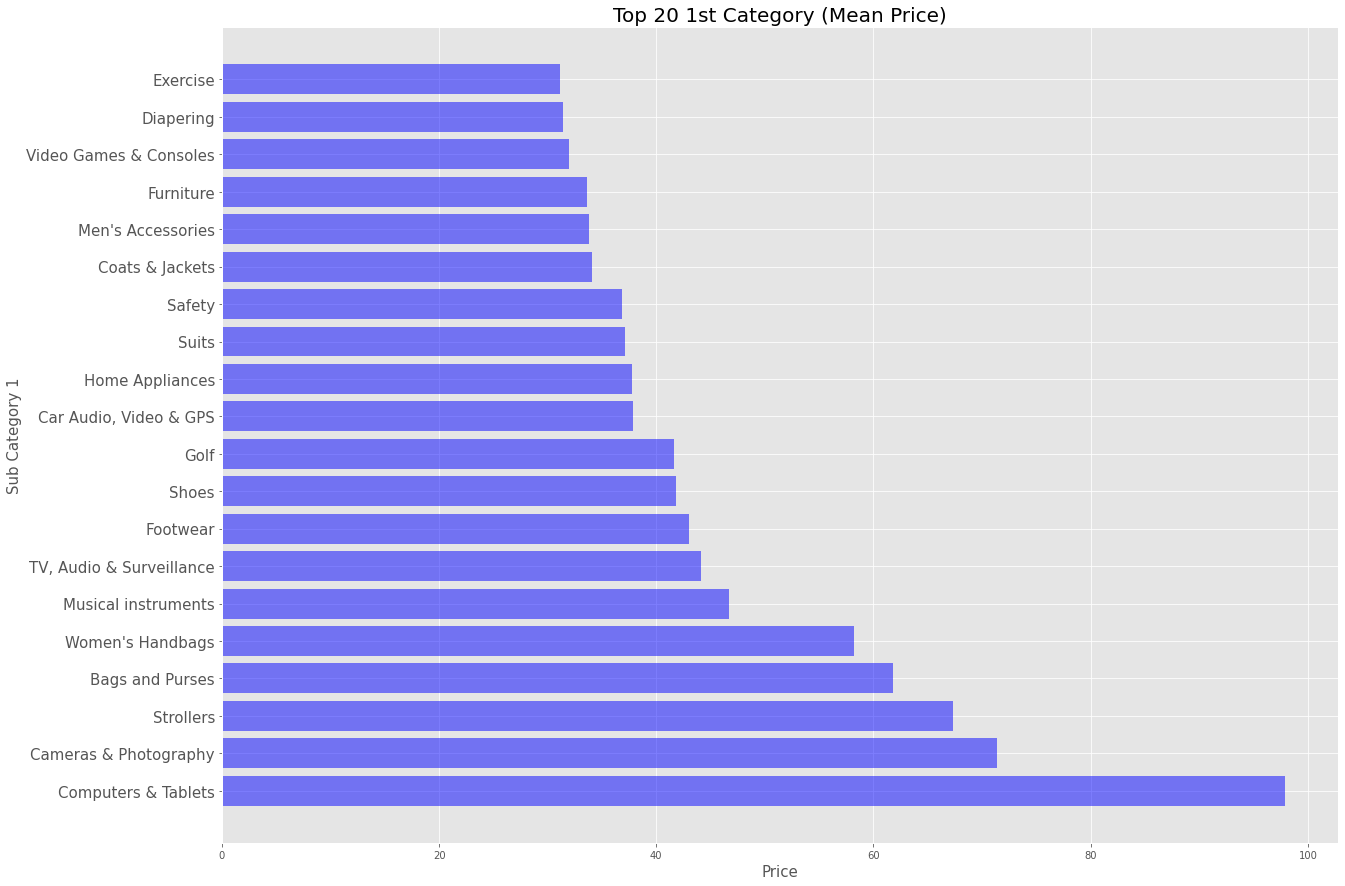

In [47]:
df = cat_train.groupby(['category_sub1'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False)[0:20]

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='b')
plt.yticks(range(0,len(df)), df['category_sub1'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 1', fontsize=15)
plt.title('Top 20 1st Category (Mean Price)', fontsize=20)
plt.show()

* Top 20 giá trung bình của các nhãn categoy_sub1

In [48]:
train['price'] = np.log1p(train['price'])

In [49]:
train['shipping'].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

In [50]:
train['item_description'].value_counts().head()

No description yet    82489
New                    4099
Brand new              3058
Good condition         1274
Great condition        1158
Name: item_description, dtype: int64

In [51]:
train['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

In [52]:
train['brand_name'].value_counts().head()

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
Name: brand_name, dtype: int64

In [53]:
train['category_name'].value_counts().head(10)

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Name: category_name, dtype: int64

In [54]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1482535, 13)
Test data shape: (3460725, 7)


In [55]:
train.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,price_bin,category_main,category_sub1,category_sub2,no_brand
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet,q1,Men,Tops,T-shirts,True
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,3.970292,0,This keyboard is in great condition and works ...,q4,Electronics,Computers & Tablets,Components & Parts,False
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,2.397895,1,Adorable top with a hint of lace and a key hol...,q1,Women,Tops & Blouses,Blouse,False
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,3.583519,1,New with tags. Leather horses. Retail for [rm]...,q4,Home,Home Décor,Home Décor Accents,True
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,3.806662,0,Complete with certificate of authenticity,q4,Women,Jewelry,Necklaces,True
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,4.094345,0,"Banana republic bottoms, Candies skirt with ma...",q4,Women,Other,Other,True
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,4.174387,0,Size small but straps slightly shortened to fi...,q4,Women,Swimwear,Two-Piece,False
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,1.945910,1,You get three pairs of Sophie cheer shorts siz...,q1,Sports & Outdoors,Apparel,Girls,False
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,2.995732,0,Girls Size small Plus green. Three shorts total.,q3,Sports & Outdoors,Apparel,Girls,False
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,2.197225,0,I realized his pants are on backwards after th...,q1,Vintage & Collectibles,Collectibles,Doll,True


In [56]:
# Remove Punctuation
combined.item_description = combined.item_description.astype(str)

descr = combined[['item_description', 'price']]
descr['count'] = descr['item_description'].apply(lambda x : len(str(x)))

descr['item_description'] = descr['item_description'].apply(remove_digits)
descr['item_description'] = descr['item_description'].apply(remove_punctuation)
# descr['item_description'] = descr['item_description'].apply(remove_stop_words)
descr.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,item_description,price,count
0,No description yet,10.0,18
1,This keyboard is in great condition and works ...,52.0,188
2,Adorable top with a hint of lace and a key hol...,10.0,124


*Loại bỏ dấu câu và các chữ số trong item_description*


In [57]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

descr['item_description'] = descr['item_description'].apply(porter.stem)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


*Làm sạch item_description*

In [58]:
descr.tail(10)

,item_description,price,count
3460715,this is a preloves navy blue and white stripes...,NaN,165
3460716,new with tags size s asking what i paid plus ...,NaN,96
3460717,brand new factory box free ship,NaN,35
3460718,no description yet,NaN,18
3460719,bright white denim jacket from old navy needs ...,NaN,951
3460720,it cosmetics bye bye foundation full coverage ...,NaN,726
3460721,♡ pairs of omighty trackiez one m and one s bo...,NaN,73
3460722,size toddler pink high top converse shoes sti...,NaN,150
3460723,super super comfy i have a pair but ordered th...,NaN,72
3460724,genuine leather and faux fur insulated coat b...,NaN,287


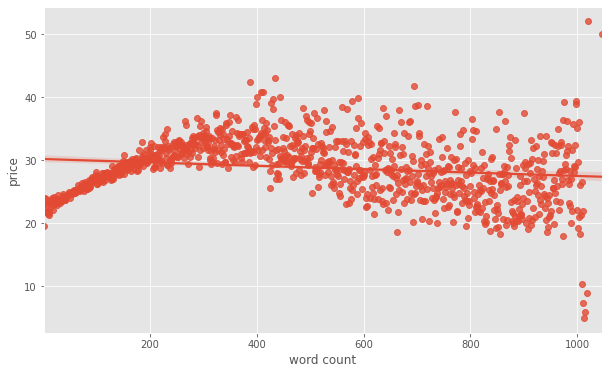

In [59]:
df = descr.groupby('count')['price'].mean().reset_index()
sns.regplot(x=df["count"], y=(df["price"]))
plt.xlabel("word count")
plt.show()

**Có một mối quan hệ tuyến tính tích cực giữa số lượng từ và giá từ khoảng 0-300 từ. Sau đó, có một mối quan hệ tiêu cực dần dần, giảm xuống ở khoảng điểm 1000 từ.
**

In [60]:
def category_split(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Missing', 'Missing', 'Missing']

In [61]:
train['main_cat'], train['sub_cat'], train['item_cat'] = zip(*train['category_name'].apply(lambda x: category_split(x)))
test['main_cat'], test['sub_cat'], test['item_cat'] = zip(*test['category_name'].apply(lambda x: category_split(x)))

In [62]:
train['category_name'] = train['category_name'].fillna(value='Missing')
train['brand_name'] = train['brand_name'].fillna(value='Missing')
train['item_description'] = train['item_description'].fillna(value='Missing')

In [63]:
test['category_name'] = test['category_name'].fillna(value='Missing')
test['brand_name'] = test['brand_name'].fillna(value='Missing')
test['item_description'] = test['item_description'].fillna(value='Missing')

*Các giá trị Null trong Tệp Test và Train thay bằng giá trị MIssing*

In [64]:
cnt_vec = CountVectorizer()

X_train_name = cnt_vec.fit_transform(train['name'])
X_test_name = cnt_vec.transform(test['name'])

In [65]:
print(X_train_name.shape)
print(X_test_name.shape)

(1482535, 105757)
(3460725, 105757)


In [66]:
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), stop_words='english')

X_train_descp = tfidf_descp.fit_transform(train['item_description'])
X_test_descp = tfidf_descp.transform(test['item_description'])

In [67]:
from sklearn.preprocessing import LabelBinarizer

In [68]:
lb_brand_name = LabelBinarizer(sparse_output=True)
X_train_brand = lb_brand_name.fit_transform(train['brand_name'])
X_test_brand = lb_brand_name.transform(test['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_train_item_condition_id = lb_item_cond_id.fit_transform(train['item_condition_id'])
X_test_item_condition_id = lb_item_cond_id.transform(test['item_condition_id'])

lb_shipping = LabelBinarizer(sparse_output=True)
X_train_shipping = lb_shipping.fit_transform(train['shipping'])
X_test_shipping = lb_shipping.transform(test['shipping'])

**Biến đổi Brand_name, Item_condition_id,shipping**

In [69]:
lb_main_cat = LabelBinarizer(sparse_output=True)
X_train_main_cat = lb_main_cat.fit_transform(train['main_cat'])
X_test_main_cat = lb_main_cat.transform(test['main_cat'])

lb_sub_cat = LabelBinarizer(sparse_output=True)
X_train_sub_cat = lb_sub_cat.fit_transform(train['sub_cat'])
X_test_sub_cat = lb_sub_cat.transform(test['sub_cat'])

lb_item_cat = LabelBinarizer(sparse_output=True)
X_train_item_cat = lb_item_cat.fit_transform(train['item_cat'])
X_test_item_cat = lb_item_cat.transform(test['item_cat'])

**Biến đổi main_cat,sub_cat và item_cat**

In [70]:
# Full dataframe printing
print(type(X_train_brand), type(X_train_item_condition_id), type(X_train_shipping))
print(type(X_test_brand), type(X_test_item_condition_id), type(X_test_shipping))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>


In [71]:
# Train dataframe printing
print('X_train_brand shape:', X_train_brand.shape)
print('X_train_item_cond_id shape:', X_train_item_condition_id.shape)
print('X_train_shipping shape:', X_train_shipping.shape)
print('X_train_main_cat shape:', X_train_main_cat.shape)
print('X_train_sub_cat shape:', X_train_sub_cat.shape)
print('X_train_item_cat shape:', X_train_item_cat.shape)

X_train_brand shape: (1482535, 4810)
X_train_item_cond_id shape: (1482535, 5)
X_train_shipping shape: (1482535, 1)
X_train_main_cat shape: (1482535, 11)
X_train_sub_cat shape: (1482535, 114)
X_train_item_cat shape: (1482535, 871)


In [72]:
# Test dataframe printing
print('X_test_brand shape:', X_test_brand.shape)
print('X_test_item_cond_id shape:', X_test_item_condition_id.shape)
print('X_test_shipping shape:', X_test_shipping.shape)
print('X_test_main_cat shape:', X_test_main_cat.shape)
print('X_test_sub_cat shape:', X_test_sub_cat.shape)
print('X_test_item_cat shape:', X_test_item_cat.shape)

X_test_brand shape: (3460725, 4810)
X_test_item_cond_id shape: (3460725, 5)
X_test_shipping shape: (3460725, 1)
X_test_main_cat shape: (3460725, 11)
X_test_sub_cat shape: (3460725, 114)
X_test_item_cat shape: (3460725, 871)


In [73]:
from scipy.sparse import hstack
import gc

In [74]:
sparse_matrix_list = (X_train_name, X_train_descp, X_train_brand, 
                      X_train_item_condition_id, X_train_shipping, 
                      X_train_main_cat, X_train_sub_cat, X_train_item_cat)

In [75]:
X_train = hstack(sparse_matrix_list).tocsr()
print(type(X_train), X_train.shape)

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


In [76]:
del X_train
gc.collect()

200

In [77]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_orig_price(y_test, preds):
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    return rmsle(y_test_exmpm, preds_exmpm)

In [78]:
def model_train_predict(model, matrix_list):
    X = hstack(matrix_list).tocsr()
    X_train, X_test, y_train, y_test = train_test_split(X, train['price'], test_size=0.2)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    del X, X_train, X_test, y_train
    gc.collect()
    
    return preds, y_test

In [79]:
linear_model = Ridge(solver='lsqr', fit_intercept=False)

sparse_matrix_list = (X_train_name, X_train_brand, 
                      X_train_item_condition_id, X_train_shipping, 
                      X_train_main_cat, X_train_sub_cat, X_train_item_cat)

linear_preds, y_test = model_train_predict(model=linear_model, 
                                           matrix_list=sparse_matrix_list)

print('Item Description rmsle:', evaluate_orig_price(y_test, linear_preds))

sparse_matrix_list = (X_train_name, X_train_descp, X_train_brand, 
                      X_train_item_condition_id, X_train_shipping, 
                      X_train_main_cat, X_train_sub_cat, X_train_item_cat)


linear_preds, y_test = model_train_predict(model=linear_model, 
                                           matrix_list=sparse_matrix_list)
print('Item Description rmsle:', evaluate_orig_price(y_test, linear_preds))

Item Description rmsle: 0.5033006242526792
Item Description rmsle: 0.4713811523192656


In [80]:
sparse_matrix_list = (X_train_name, X_train_descp, X_train_brand, 
                      X_train_item_condition_id, X_train_shipping, 
                      X_train_main_cat, X_train_sub_cat, X_train_item_cat)

X_train = hstack(sparse_matrix_list).tocsr()
X_train

<1482535x161569 sparse matrix of type '<class 'numpy.float64'>'
	with 47372136 stored elements in Compressed Sparse Row format>

In [81]:
sparse_matrix_list = (X_test_name, X_test_descp, X_test_brand, 
                      X_test_item_condition_id, X_test_shipping, 
                      X_test_main_cat, X_test_sub_cat, X_test_item_cat)
X_test = hstack(sparse_matrix_list).tocsr()

In [82]:
y_train = train['price']
y_train

0          2.397895
1          3.970292
2          2.397895
3          3.583519
4          3.806662
             ...   
1482530    3.044522
1482531    2.708050
1482532    2.564949
1482533    3.828641
1482534    3.135494
Name: price, Length: 1482535, dtype: float64

In [83]:
linear_model.fit(X_train, y_train)

Ridge(fit_intercept=False, solver='lsqr')

In [84]:
preds = linear_model.predict(X_test)
preds

array([2.38793343, 2.59012101, 3.90617975, ..., 2.86666837, 2.84447887,
       3.11745025])

In [85]:
preds = np.expm1(preds)
preds

array([ 9.89096376, 12.33138478, 48.70868925, ..., 16.57835588,
       16.19259684, 21.58871064])

In [86]:
submission = pd.read_csv('sample_submission_stg2.csv')
submission

,test_id,price
0,0,26.738
1,1,26.738
2,2,26.738
3,3,26.738
4,4,26.738
...,...,...
3460720,3460720,26.738
3460721,3460721,26.738
3460722,3460722,26.738
3460723,3460723,26.738


In [87]:
submission.loc[:, 'price'] = preds
submission

,test_id,price
0,0,9.890964
1,1,12.331385
2,2,48.708689
3,3,16.991770
4,4,8.030248
...,...,...
3460720,3460720,7.351566
3460721,3460721,24.814442
3460722,3460722,16.578356
3460723,3460723,16.192597


In [88]:
submission.to_csv('submission.csv', index=False)